#### **MBD 2023-2024**
# **Fundamentals of Deep Learning Final project**


# Part 1: Accident Images Analysis Dataset

## **1. Setting -up eviroment**

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
from glob import iglob

# %tensorflow_version 2.x

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import tensorflow.keras.applications.vgg16 as vgg16
import tensorflow.keras.applications.resnet50 as resnet50
from keras.layers import Dropout
from keras.layers import GlobalAveragePooling2D
import pandas as pd

from tensorflow.keras.utils import plot_model

2024-04-05 13:50:27.321306: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-04-05 13:50:28.136970: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


## **2. Loading data**

In [2]:
!wget https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true -O data.rar

--2024-04-05 14:00:56--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/blob/master/Accident%20Images%20Analysis%20Dataset.rar?raw=true
Resolving github.com (github.com)... 20.205.243.166
Connecting to github.com (github.com)|20.205.243.166|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2024-04-05 14:00:56--  https://github.com/mghatee/Accident-Images-Analysis-Dataset/raw/master/Accident%20Images%20Analysis%20Dataset.rar
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar [following]
--2024-04-05 14:00:56--  https://raw.githubusercontent.com/mghatee/Accident-Images-Analysis-Dataset/master/Accident%20Images%20Analysis%20Dataset.rar
Resolvin

In [3]:
!unrar x -o+ -y -inul data.rar

In [4]:
basepath = 'Accident Images Analysis Dataset/'

def prepare_images(path, num_classes,  load_img_kwargs={}, ext='.jpg'):
  X, y = [], []
  for class_ in range(num_classes):
    for img_path in iglob(path + str(class_ + 1) + '/' + '*' + ext):
      img = image.load_img(img_path, **load_img_kwargs)
      x = image.img_to_array(img)
      X.append(x)
      y.append(class_)
  return np.array(X), np.array(y)

In [5]:
X, y = prepare_images(basepath + 'Accident-Severity/', 3,  load_img_kwargs={'target_size': (224, 224)})

len(X), len(y), np.unique(y)

(2946, 2946, array([0, 1, 2]))

In [6]:
# Check the shape of dataset
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2946, 224, 224, 3)
Shape of y: (2946,)


In [7]:
# Check the colour scale
print("Minimum pixel value:", np.min(X))
print("Maximum pixel value:", np.max(X))

Minimum pixel value: 0.0
Maximum pixel value: 255.0


Result: Our data are RGB (TrueColor) images, the pixel values for each color channel (red, green, and blue) also range from 0 to 255

## **3. Data Processing**



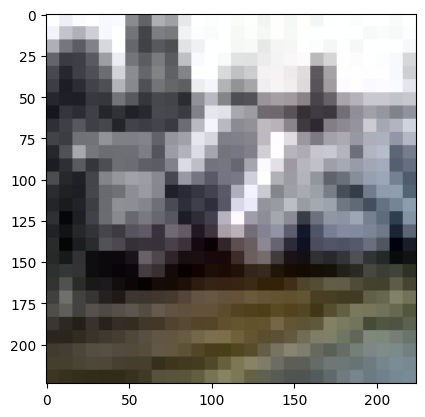

Label = 0


In [8]:
# Check a random observation
plt.imshow(X[0].astype('uint8'))
plt.show()
print('Label =', y[0])

In [9]:
# Split data into trainset and testset
X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.2)

In [10]:
# Performing a basic preprocessing step to convert all values fall between 0 and 1. (RGB (TrueColor) sclae 0-255 range)
X_train = X_train.astype('float32')
X_test  = X_test.astype('float32')

X_train /= 255
X_test  /= 255

print(X_train.shape[0], 'train samples')
print(X_test.shape[0],  'test samples')

2356 train samples
590 test samples


In [11]:
# Create one-hot encode the outputs: create 3 output neurons
num_classes = 3

y_train = to_categorical(y_train, num_classes)
y_test  = to_categorical(y_test, num_classes)

print('First label is now = ', y_train[0])

First label is now =  [0. 1. 0.]


In [12]:
print("Shape of X:", X_train.shape)

Shape of X: (2356, 224, 224, 3)


## **4. Multi-layer perceptron networks**

### **4.1 Model 1**

In [ ]:
# Define model
model = Sequential()
model.add(Flatten(input_shape=(224, 224, 3)))  # Add Flatten layer to flatten the input images
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Print model summary
model.summary()

/home/hanhtran/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
2024-04-05 05:02:51.399769: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 10225 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1
2024-04-05 05:02:51.400293: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1928] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 10510 MB memory:  -> device: 1, name: NVIDIA GeForce GTX 1080 Ti, pci bus id: 0000:02:00.0, compute capability: 6.1


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │     1,204,232 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 8)              │            72 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,204,331 (4.59 MB)

 Trainable params: 1,204,331 (4.59 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit our model (batch_size determines the size of each minibatch to perform gradient descent)
batch_size  = 128
epochs      = 30

model.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_test, y_test))

Epoch 1/30


I0000 00:00:1712318574.212225   10640 service.cc:145] XLA service 0x7f3608008d90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1712318574.212275   10640 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
I0000 00:00:1712318574.212283   10640 service.cc:153]   StreamExecutor device (1): NVIDIA GeForce GTX 1080 Ti, Compute Capability 6.1
2024-04-05 05:02:54.276224: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-04-05 05:02:54.442652: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907


 8/19 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.4962 - loss: 19.3572

I0000 00:00:1712318575.092616   10640 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - accuracy: 0.4625 - loss: 12.3372 - val_accuracy: 0.4169 - val_loss: 1.0724
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.4871 - loss: 1.0664 - val_accuracy: 0.5407 - val_loss: 1.0518
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5347 - loss: 1.0465 - val_accuracy: 0.5407 - val_loss: 1.0327
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5385 - loss: 1.0274 - val_accuracy: 0.5407 - val_loss: 1.0142
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.5454 - loss: 1.0091 - val_accuracy: 0.5407 - val_loss: 0.9964
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5483 - loss: 0.9931 - val_accuracy: 0.5407 - val_loss: 0.9790
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5372 - loss: 0.9702 - val_accuracy: 0.5407 - val_loss: 0.9625
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5611 - loss: 0.9527 - val_accuracy: 0.5407 - val_loss: 

In [ ]:
# Evaluate our model
score = model.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Test loss: 0.8274896740913391
Test accuracy: 0.5406779646873474


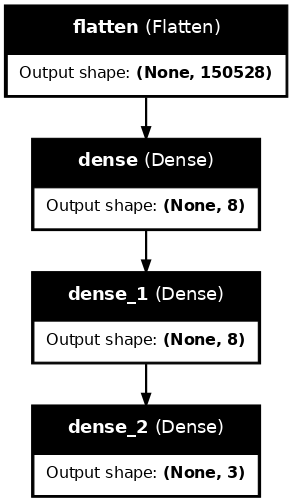

In [ ]:
plot_model(model, to_file='model1.png', show_shapes=True, show_layer_names=True, dpi=80)

### **4.2 Model 2**

In [ ]:
# Define model
model2 = Sequential()
model2.add(Flatten(input_shape=(224, 224, 3)))
model2.add(Dense(40, activation='relu'))
model2.add(Dense(30, activation='relu'))
model2.add(Dense(28, activation='relu'))
model2.add(Dense(25, activation='relu'))
model2.add(Dense(22, activation='relu'))
model2.add(Dense(20, activation='relu'))
model2.add(Dense(10, activation='relu'))

model2.add(Dense(num_classes, activation='softmax'))

# Print model summary
model2.summary()

/home/hanhtran/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 40)             │     6,021,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 28)             │           868 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 25)             │           725 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 22)             │           572 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 20)             │           460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,025,258 (22.98 MB)

 Trainable params: 6,025,258 (22.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
model2.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit our model (batch_size determines the size of each minibatch to perform gradient descent)
batch_size  = 128
epochs      = 20

model2.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_test, y_test))

Epoch 1/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 147ms/step - accuracy: 0.4982 - loss: 5.9901 - val_accuracy: 0.5407 - val_loss: 2.7669
Epoch 2/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5264 - loss: 1.4046 - val_accuracy: 0.4169 - val_loss: 1.6424
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4443 - loss: 1.5498 - val_accuracy: 0.4169 - val_loss: 1.2676
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.4862 - loss: 1.0888 - val_accuracy: 0.5407 - val_loss: 1.1138
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.5633 - loss: 0.8824 - val_accuracy: 0.4169 - val_loss: 1.9918
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.4794 - loss: 1.3148 - val_accuracy: 0.4644 - val_loss: 0.8565
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5372 - loss: 0.8358 - val_accuracy: 0.5424 - val_loss: 0.8110
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - accuracy: 0.5637 - loss: 0.8114 - val_accuracy: 0.4373 - 

In [ ]:
# Evaluate our model
score = model2.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Test loss: 0.7943243980407715
Test accuracy: 0.6084745526313782


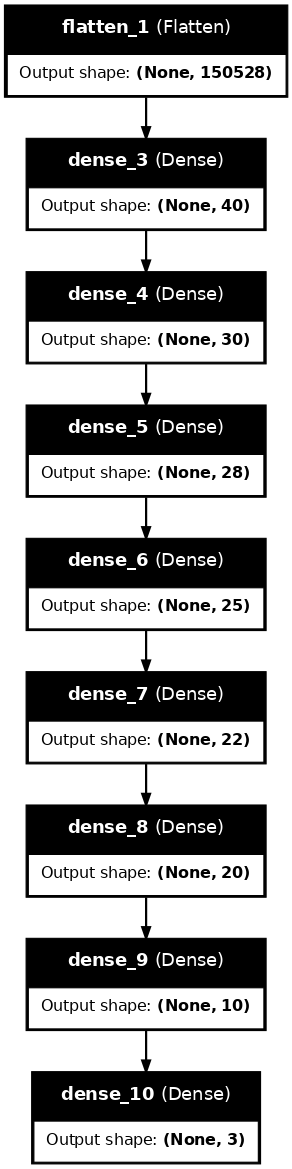

In [ ]:
plot_model(model2, to_file='model2.png', show_shapes=True, show_layer_names=True, dpi=80)

### **4.2 Model 3**

In [ ]:
# Define model
model3 = Sequential()
model3.add(Flatten(input_shape=(224, 224, 3)))
model3.add(Dense(40, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(30, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(28, activation='relu'))
model3.add(Dense(25, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(22, activation='relu'))
model3.add(Dense(20, activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(10, activation='relu'))
model3.add(Dropout(0.2))

model3.add(Dense(num_classes, activation='softmax'))

# Print model summary
model3.summary()

/home/hanhtran/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 40)             │     6,021,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 40)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30)             │           120 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 28)             │           868 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 25)             │           725 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 22)             │           572 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 20)             │           460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 10)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,025,458 (22.99 MB)

 Trainable params: 6,025,358 (22.98 MB)

 Non-trainable params: 100 (400.00 B)

In [ ]:
# Compile model
model3.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit our model (batch_size determines the size of each minibatch to perform gradient descent)
batch_size  = 128
epochs      = 20

model3.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_test, y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 11s 359ms/step - accuracy: 0.4164 - loss: 1.2405 - val_accuracy: 0.5590 - val_loss: 1.0078
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.4988 - loss: 1.0154 - val_accuracy: 0.5346 - val_loss: 1.0022
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5307 - loss: 0.9435 - val_accuracy: 0.5332 - val_loss: 0.9771
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5375 - loss: 0.8923 - val_accuracy: 0.5332 - val_loss: 0.9344
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5891 - loss: 0.8338 - val_accuracy: 0.5278 - val_loss: 0.8953
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5933 - loss: 0.8043 - val_accuracy: 0.5346 - val_loss: 0.8775
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5910 - loss: 0.7975 - val_accuracy: 0.5455 - val_loss: 0.8657
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6004 - loss: 0.8040 - val_accuracy: 0.5875 -

In [ ]:
# Evaluate our model
score = model3.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Test loss: 0.7057356834411621
Test accuracy: 0.6607869863510132


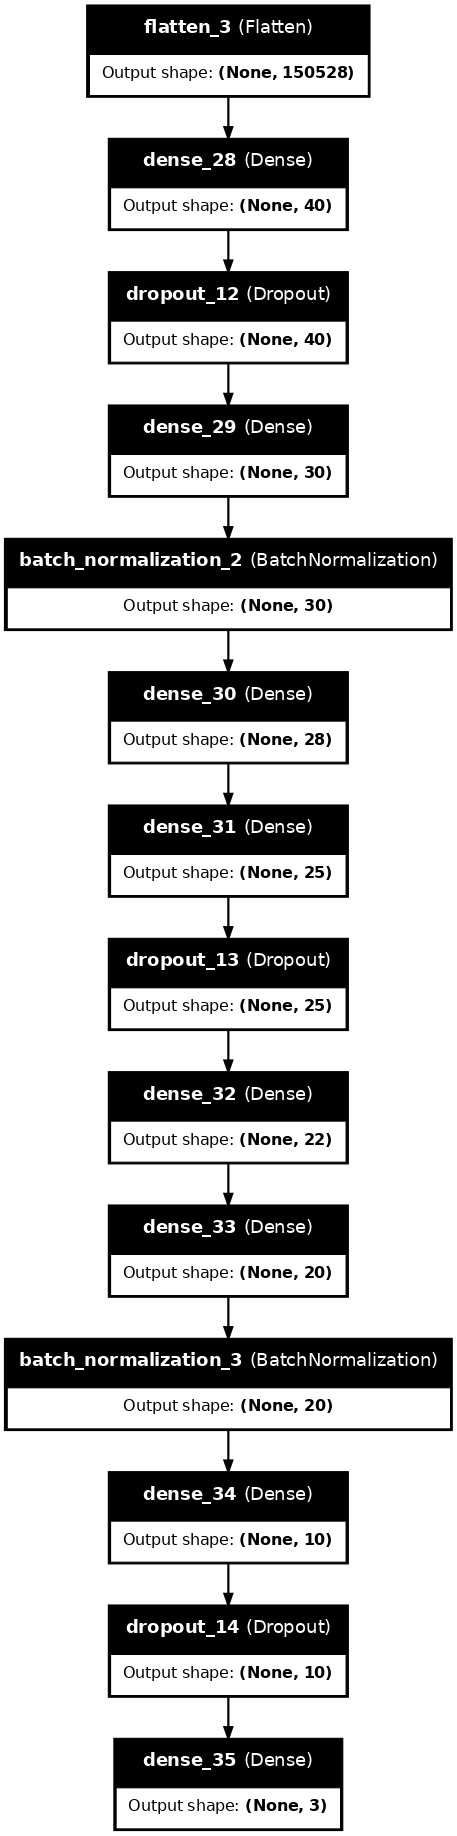

In [ ]:
plot_model(model3, to_file='model3.png', show_shapes=True, show_layer_names=True, dpi=80)

### **4.3 Model 4**

In [ ]:
# Define model
model4 = Sequential()
model4.add(Flatten(input_shape=(224, 224, 3)))
model4.add(Dense(60, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(40, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dense(30, activation='relu'))
model4.add(Dense(25, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(22, activation='relu'))
model4.add(Dense(20, activation='relu'))
model4.add(BatchNormalization())
model4.add(Dense(15, activation='relu'))  # Adding more neurons
model4.add(Dense(12, activation='relu'))  # Adding more neurons
model4.add(BatchNormalization())
model4.add(Dense(10, activation='relu'))
model4.add(Dense(8, activation='relu'))
model4.add(Dense(5, activation='relu'))
model4.add(Dropout(0.2))
model4.add(Dense(num_classes, activation='softmax'))

# Print model summary
model4.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_5 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 60)             │     9,031,740 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 60)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 40)             │         2,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 40)             │           160 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 30)             │         1,230 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 25)             │           775 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 25)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 22)             │           572 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_51 (Dense)                │ (None, 20)             │           460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 20)             │            80 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_52 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 12)             │           192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12)             │            48 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 10)             │           130 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 5)              │            45 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 5)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_57 (Dense)                │ (None, 3)              │            18 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,038,293 (34.48 MB)

 Trainable params: 9,038,149 (34.48 MB)

 Non-trainable params: 144 (576.00 B)

In [ ]:
# Compile model
model4.compile(loss='categorical_crossentropy', metrics=['accuracy'])

# Fit our model (batch_size determines the size of each minibatch to perform gradient descent)
batch_size  = 128
epochs      = 20

model4.fit(
  X_train, y_train,
  batch_size=batch_size,
  epochs=epochs,
  verbose=1,
  validation_data=(X_test, y_test))

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 12s 365ms/step - accuracy: 0.4655 - loss: 1.0566 - val_accuracy: 0.5305 - val_loss: 1.0059
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5234 - loss: 0.9722 - val_accuracy: 0.5305 - val_loss: 0.9581
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5899 - loss: 0.8969 - val_accuracy: 0.5305 - val_loss: 0.9301
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.5688 - loss: 0.8858 - val_accuracy: 0.5305 - val_loss: 0.9000
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5808 - loss: 0.8572 - val_accuracy: 0.5373 - val_loss: 0.8734
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5711 - loss: 0.8527 - val_accuracy: 0.5455 - val_loss: 0.8464
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.5967 - loss: 0.8211 - val_accuracy: 0.5699 - val_loss: 0.8258
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.6198 - loss: 0.8009 - val_accuracy: 0.5726 -

In [ ]:
# Evaluate our model
score = model4.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Test loss: 0.7512845993041992
Test accuracy: 0.6458616256713867


## **5. Convolutional neural network**



### **5.1 Create a good model and run experiment**

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, Dropout, GlobalAveragePooling2D, BatchNormalization, Dense
from keras.callbacks import ReduceLROnPlateau

cmodel = Sequential()
cmodel.add(Conv2D(16, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
cmodel.add(Dropout(0.25))
cmodel.add(Conv2D(32, (3, 3), activation='relu'))
cmodel.add(Dropout(0.25))
cmodel.add(Conv2D(64, (3, 3), activation='relu'))
cmodel.add(Dropout(0.25))
cmodel.add(Conv2D(128, (3, 3), activation='relu'))
cmodel.add(Dropout(0.25))
cmodel.add(GlobalAveragePooling2D())
cmodel.add(BatchNormalization())
cmodel.add(Dropout(0.25))
cmodel.add(Dense(num_classes, activation='softmax'))

In [14]:
# Compile the model
cmodel.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
batch_size = 32
epochs = 20

history = cmodel.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/20
74/74 [==============================] - 61s 572ms/step - loss: 0.9627 - accuracy: 0.5136 - val_loss: 0.8511 - val_accuracy: 0.5424
Epoch 2/20
74/74 [==============================] - 29s 391ms/step - loss: 0.8243 - accuracy: 0.5480 - val_loss: 0.8258 - val_accuracy: 0.5424
Epoch 3/20
74/74 [==============================] - 29s 387ms/step - loss: 0.8086 - accuracy: 0.5756 - val_loss: 0.8225 - val_accuracy: 0.5424
Epoch 4/20
74/74 [==============================] - 30s 405ms/step - loss: 0.8024 - accuracy: 0.5628 - val_loss: 0.8476 - val_accuracy: 0.4254
Epoch 5/20
74/74 [==============================] - 29s 388ms/step - loss: 0.8049 - accuracy: 0.5671 - val_loss: 0.8304 - val_accuracy: 0.4881
Epoch 6/20
74/74 [==============================] - 29s 386ms/step - loss: 0.7922 - accuracy: 0.5794 - val_loss: 0.8104 - val_accuracy: 0.5475
Epoch 7/20
74/74 [==============================] - 29s 387ms/step - loss: 0.7863 - accuracy: 0.5989 - val_loss: 0.8474 - val_accuracy: 0.4458

In [15]:
# Evaluate our model
score = cmodel.evaluate(X_test, y_test, verbose=0)

print('Test loss:',     score[0])
print('Test accuracy:', score[1])

Test loss: 1.1908198595046997
Test accuracy: 0.5423728823661804


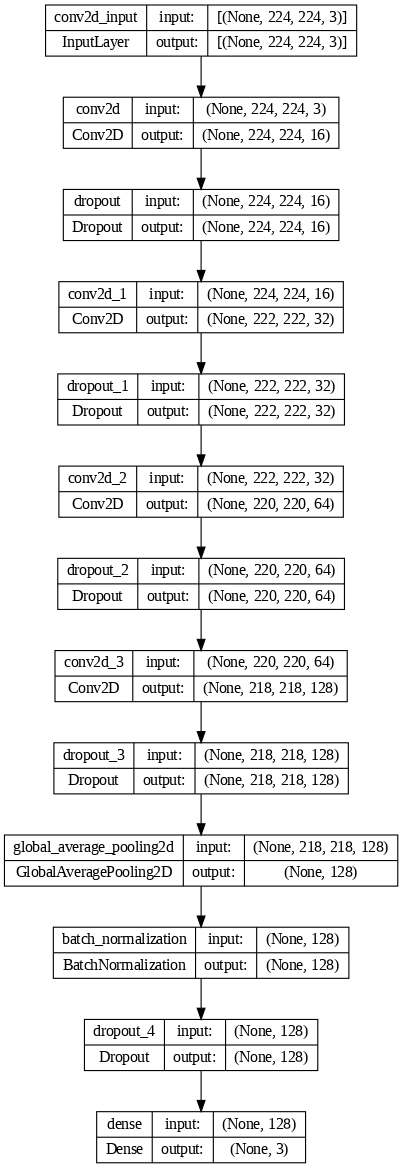

In [16]:
plot_model(cmodel, to_file='cmodel.png', show_shapes=True, show_layer_names=True, dpi=80)

### **5.2 Data augmentation**

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np

# Create an ImageDataGenerator object with desired augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    brightness_range=[0.5, 1.5],
    channel_shift_range=0.2,
    rescale=1./255
)

# Fit the ImageDataGenerator to the training data
datagen.fit(X_train)

# Create a new generator to generate augmented data for training
augmented_generator = datagen.flow(X_train, y_train, batch_size=batch_size)

In [18]:
# Train the model on the augmented data
cmodel.fit_generator(augmented_generator,
                    steps_per_epoch=int(len(X_train) / 20),
                    epochs=20,
                    validation_data=(X_test, y_test))

<ipython-input-18-3e4c51c031c2>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cmodel.fit_generator(augmented_generator,


Epoch 1/20
 74/117 [=================>............] - ETA: 24s - loss: 0.8284 - accuracy: 0.5446


117/117 [==============================] - 46s 378ms/step - loss: 0.8284 - accuracy: 0.5446 - val_loss: 0.8568 - val_accuracy: 0.5915


In [19]:
# Evaluate the model on the original test set
score2 = cmodel.evaluate(X_test, y_test, verbose=0)

# Print accuracy
print('Test loss:',     score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.8568312525749207
Test accuracy: 0.5915254354476929


### **5.3 Interpretability Method**

### **Method 1: Layer activations**

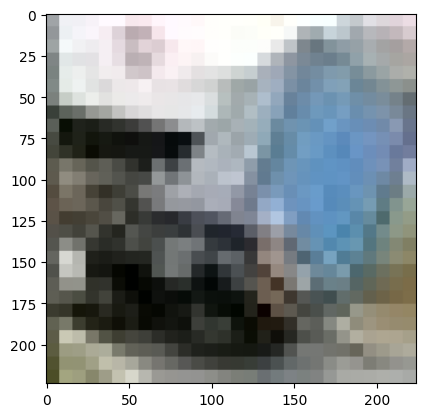

In [20]:
# Take a look in an example
plt.imshow(X_train[5])
plt.show()

In [21]:
conv_layers = [layer.name for layer in cmodel.layers if layer.name.startswith('conv2d')]
conv_layers

['conv2d', 'conv2d_1', 'conv2d_2', 'conv2d_3']

In [22]:
# Get access to activation of intermidiate leyer
def get_layer_output(model, layer_name):
  return K.function(inputs=model.inputs, outputs=[model.get_layer(layer_name).output])

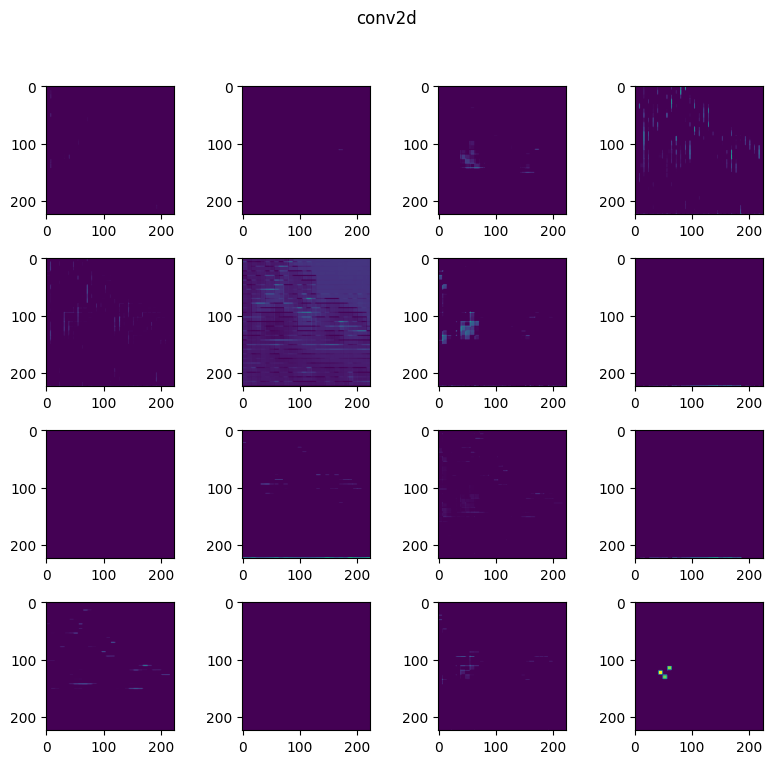

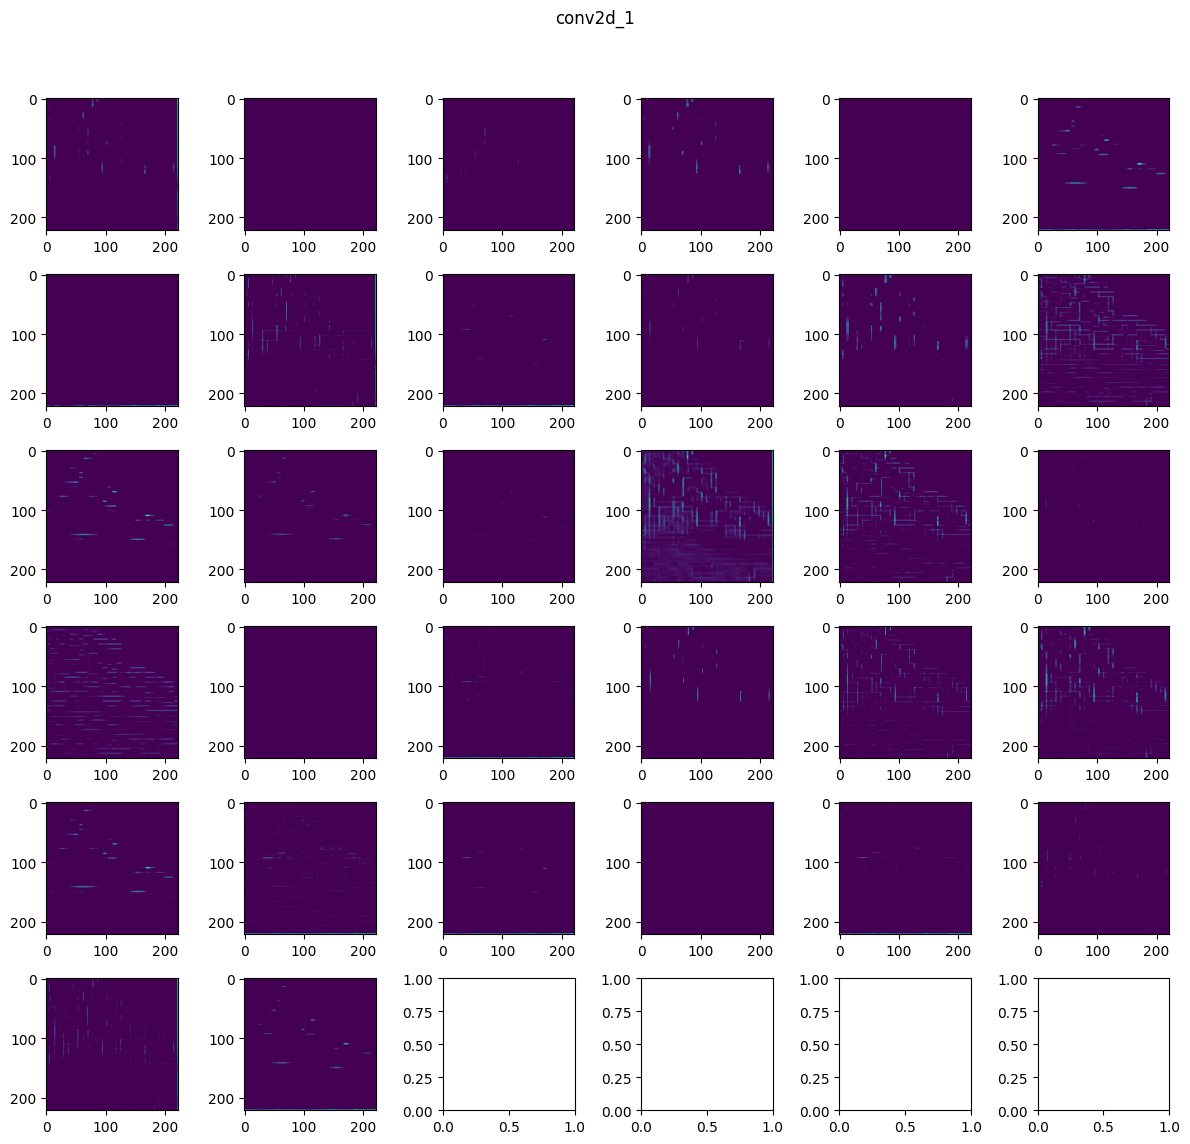

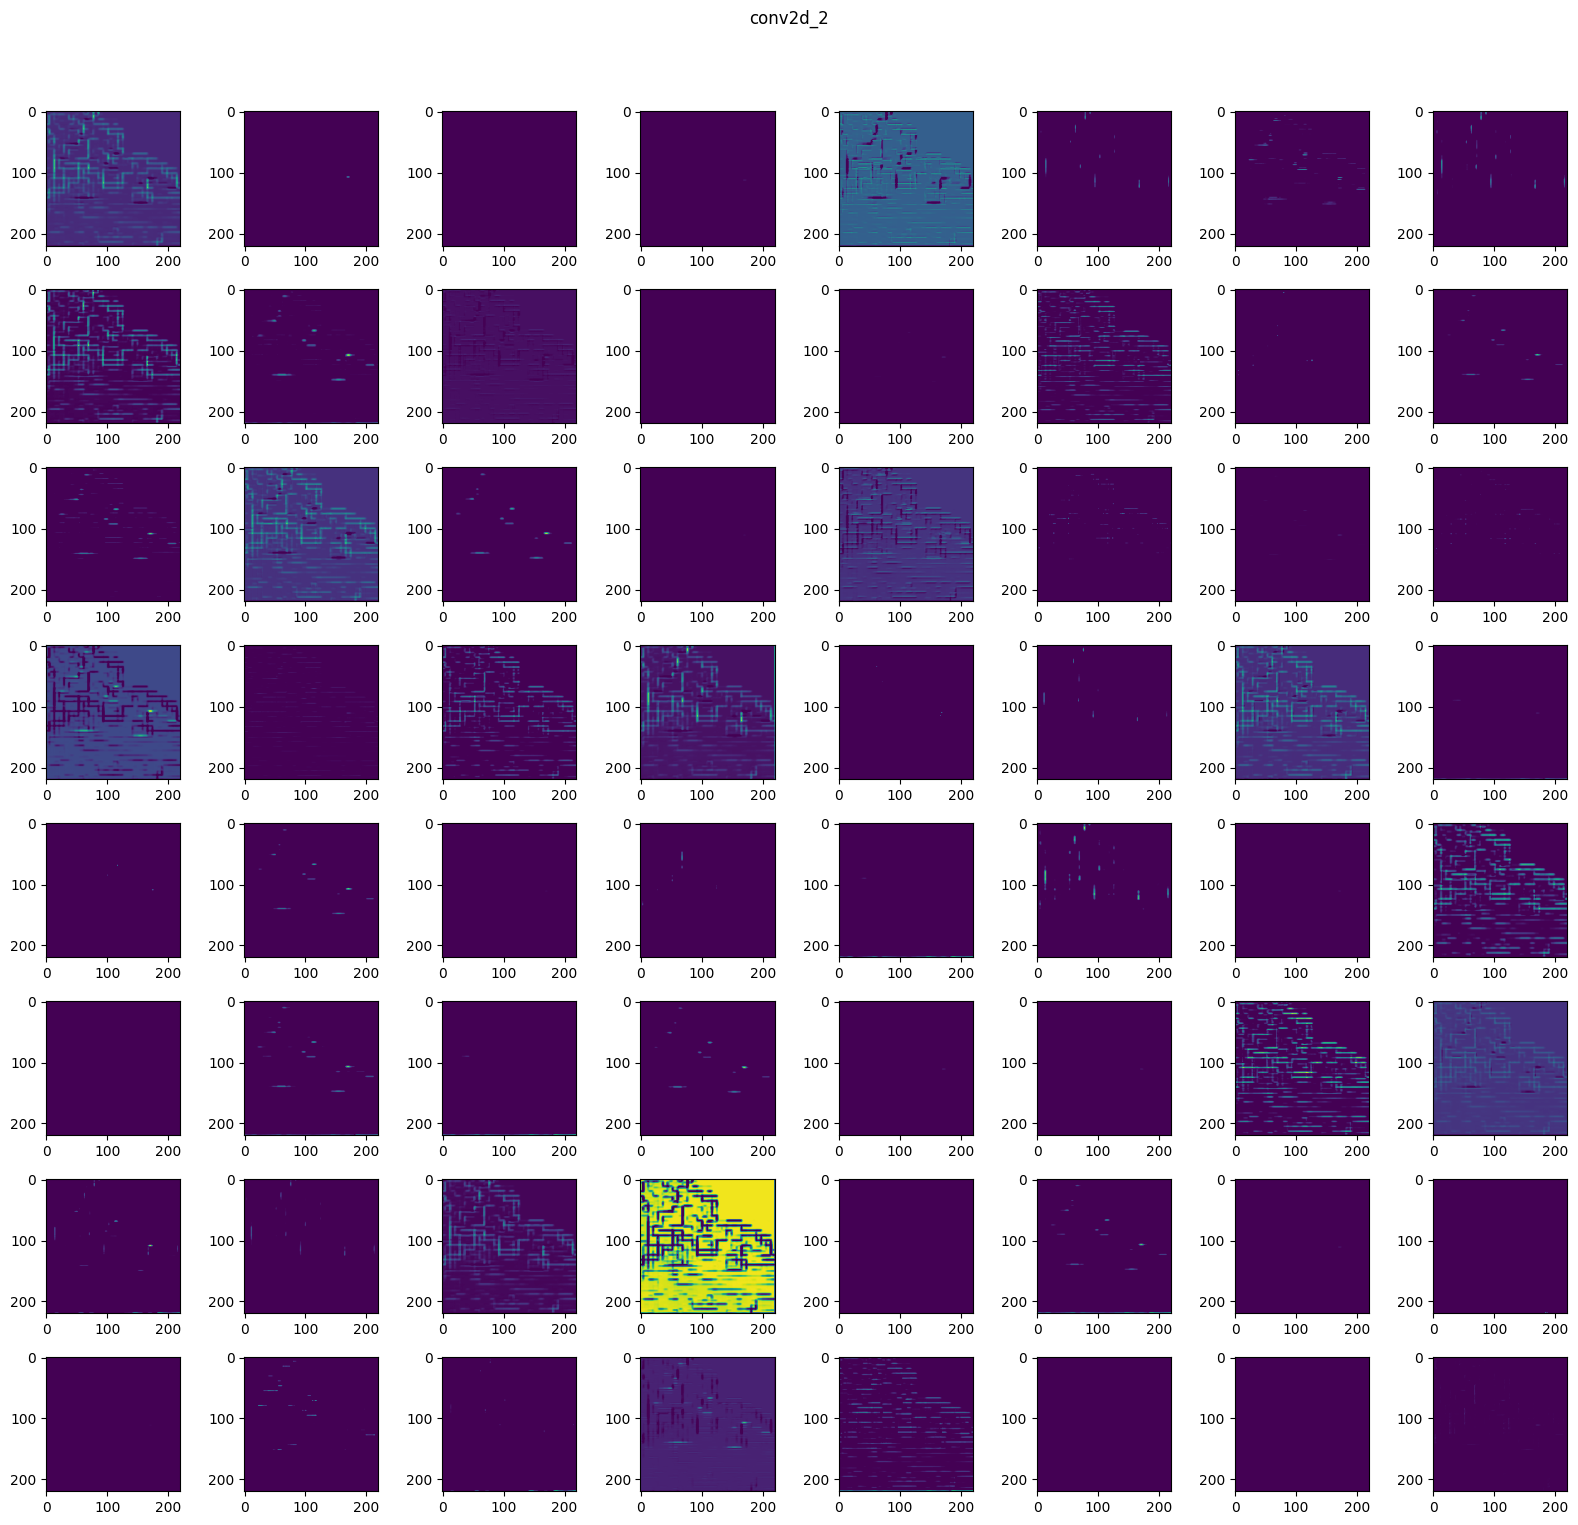

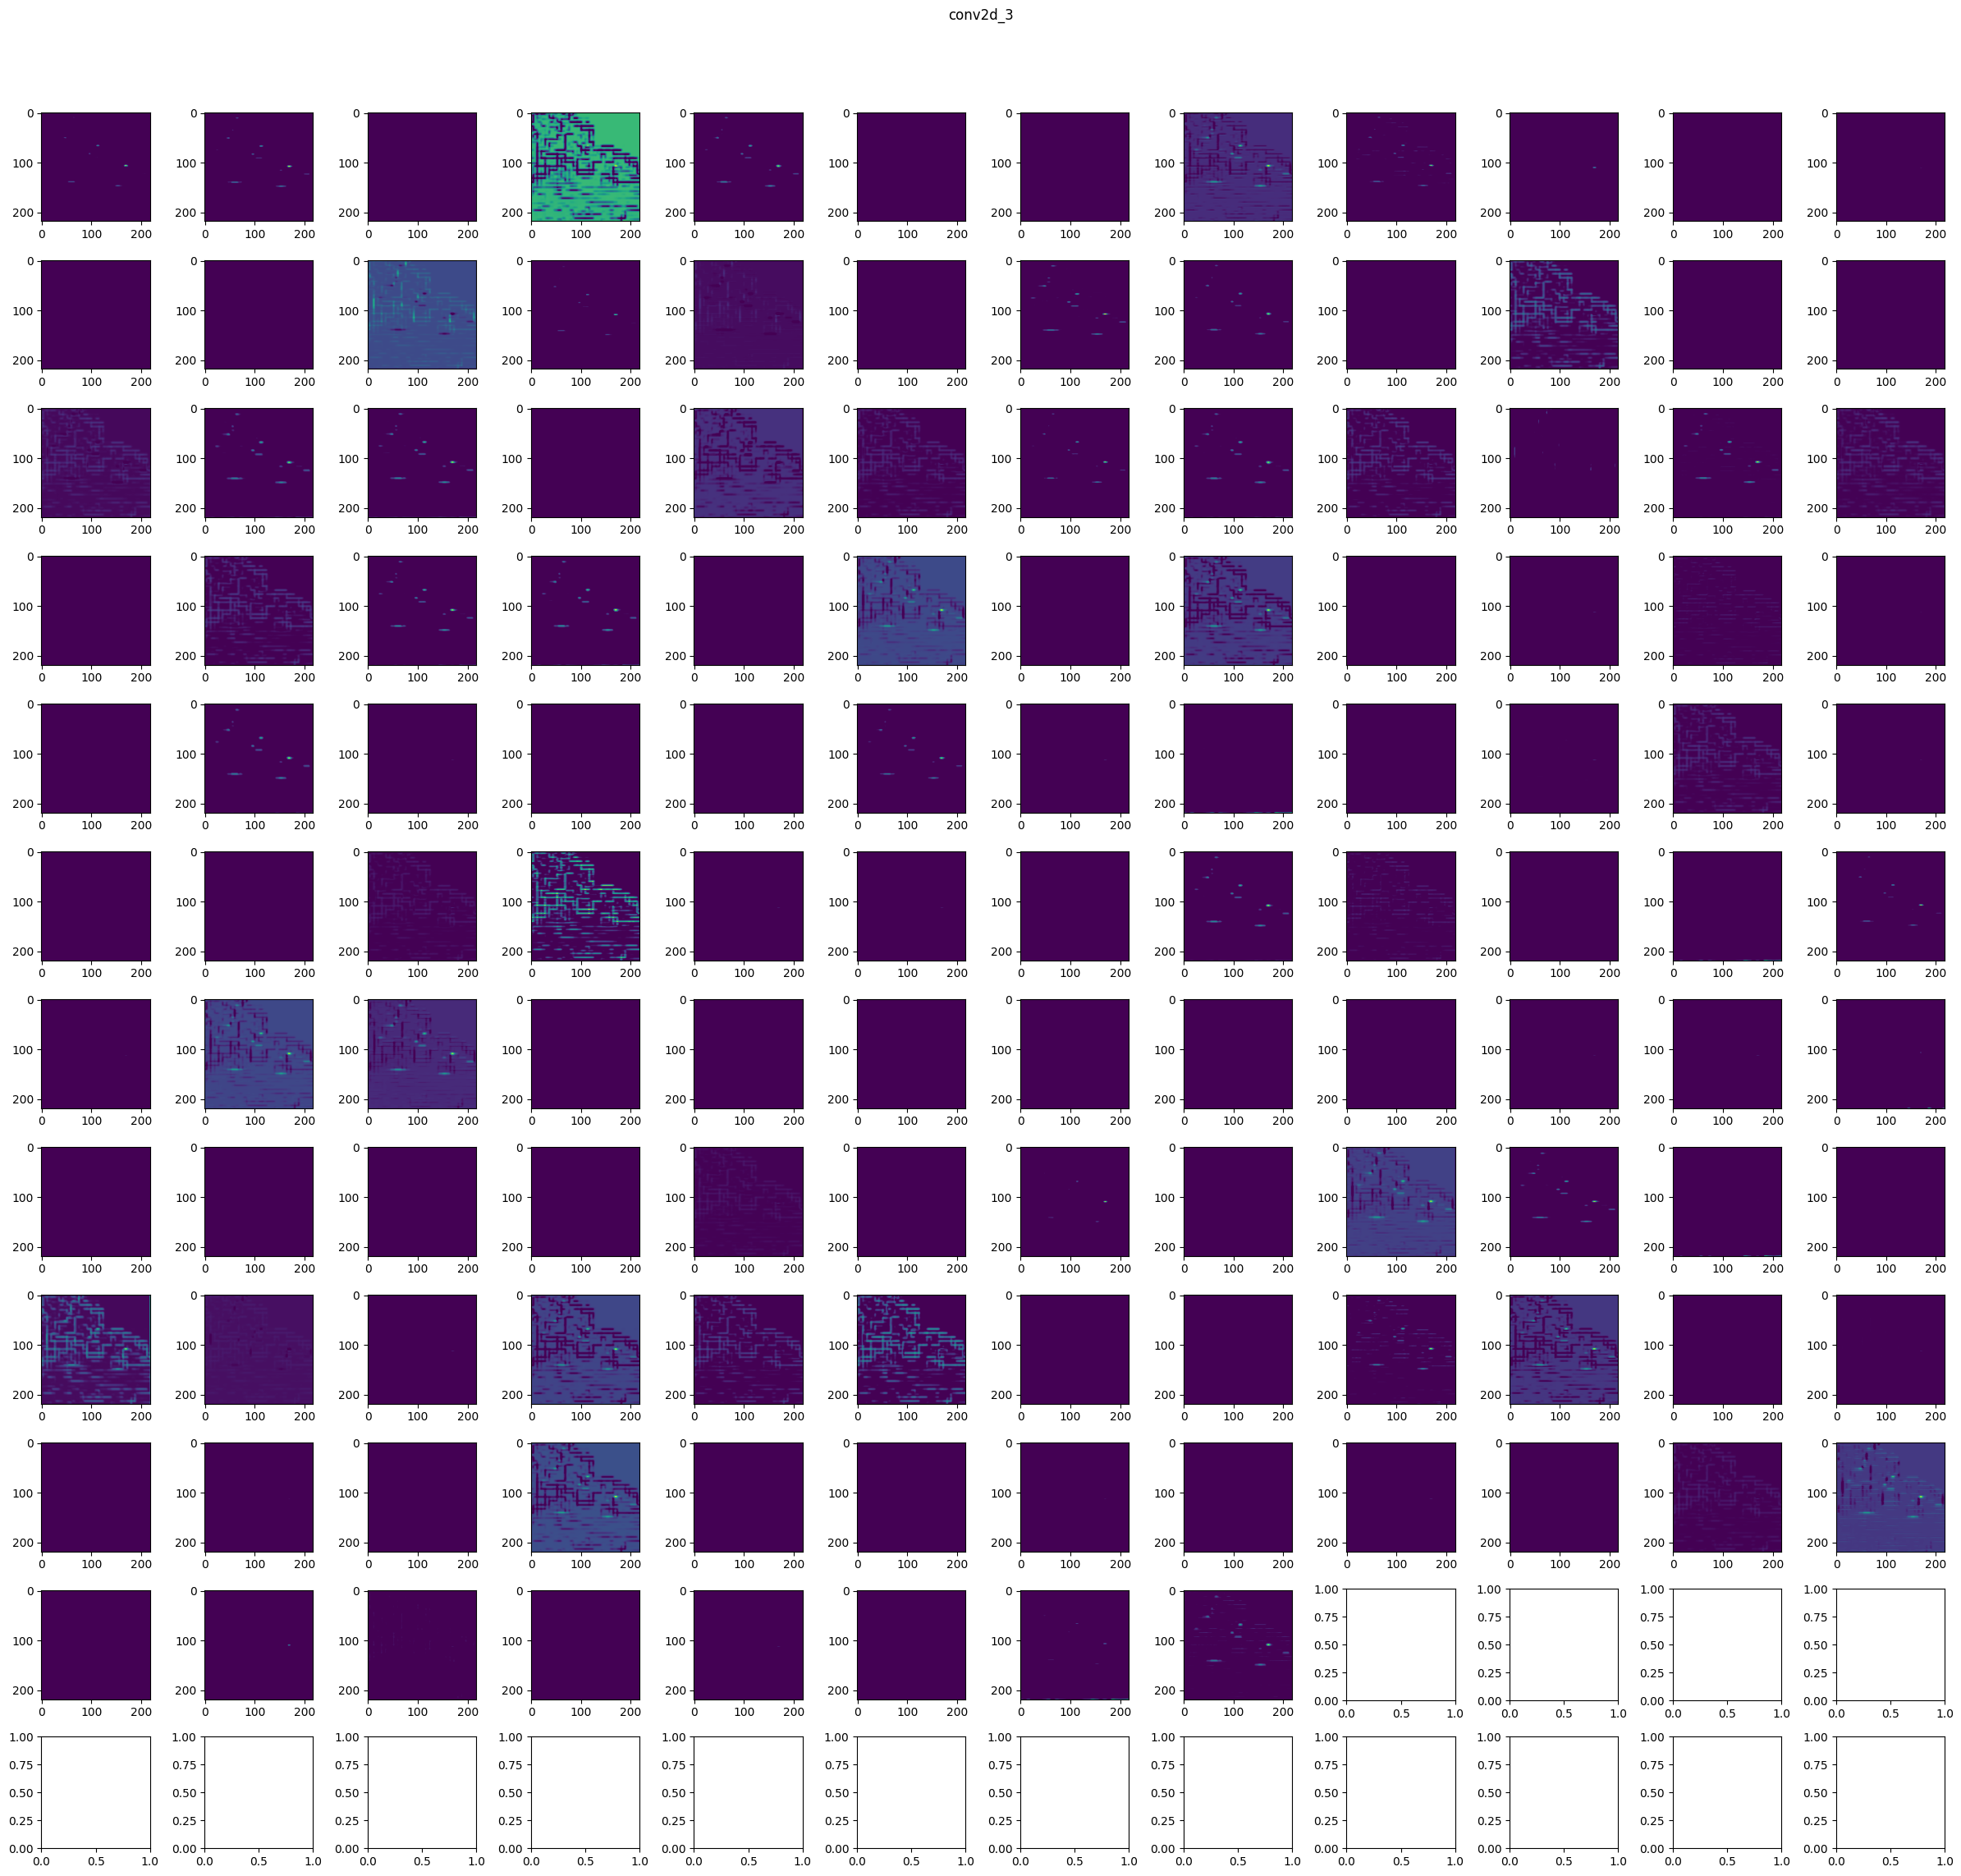

In [23]:
test_instance = X_train[2]

for layer_name in conv_layers:
  num_filters     = cmodel.get_layer(layer_name).output_shape[-1]
  get_activations = get_layer_output(cmodel, layer_name)
  activations     = get_activations(np.expand_dims(test_instance, axis=0))[0][0]
  rows_cols       = int(np.ceil(np.sqrt(num_filters)))
  fig, ax = plt.subplots(rows_cols, rows_cols, figsize=(2 * rows_cols, 2 * rows_cols))
  fig.suptitle(layer_name)
  for filter_idx in range(num_filters):
    ax[filter_idx // rows_cols][filter_idx % rows_cols].imshow(activations[:,:,filter_idx])
  fig.tight_layout(rect=[0, 0.03, 1, 0.95])
  plt.show()

### **Method 2: Maximally activating images**

In [24]:
def get_excitement(images, model, layer_name, filter_idx, batch_size=128):
  excitements = np.array([])
  get_activations = get_layer_output(model, layer_name)
  for i in range(0, len(images), batch_size):
    activations = get_activations(images[i:i+batch_size])[0][:, :, :, filter_idx]
    excitements = np.hstack([excitements, np.mean(np.abs(activations), axis=(1, 2))])
  return excitements

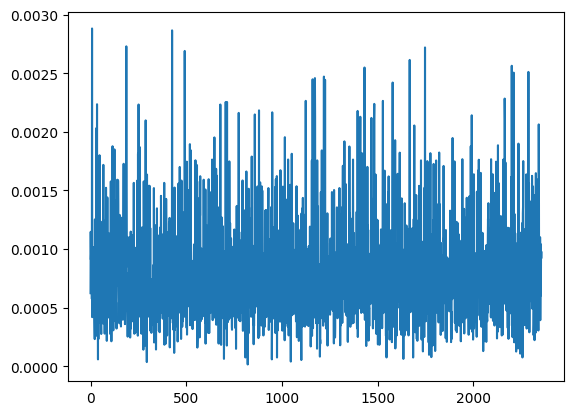

In [25]:
plt.plot(get_excitement(X_train, cmodel, 'conv2d_1', 0))

In [26]:
def show_exciting_images_layer(images, model, layer_name):
  num_filters     = model.get_layer(layer_name).output_shape[-1]
  rows_cols       = int(np.ceil(np.sqrt(num_filters)))
  fig, ax = plt.subplots(rows_cols, rows_cols, figsize=(2 * rows_cols, 2 * rows_cols))
  for filter_idx in range(num_filters):
    excitements     = get_excitement(images, model, layer_name, filter_idx)
    excitement_idx  = np.argsort(excitements)[-1:][0]
    ax[filter_idx // rows_cols][filter_idx % rows_cols].imshow(images[excitement_idx])
  fig.tight_layout()
  plt.show()

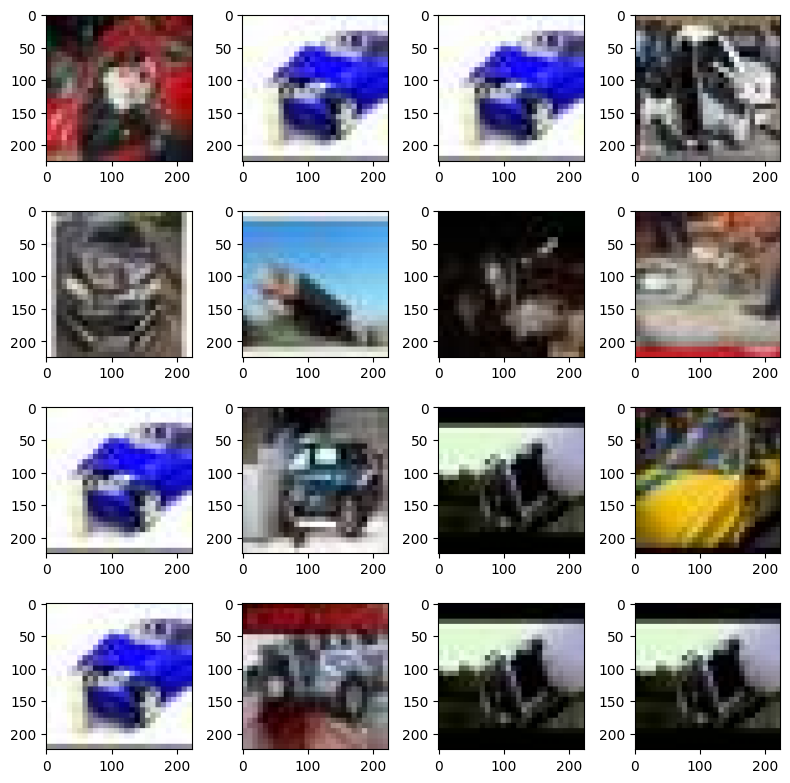

In [27]:
show_exciting_images_layer(X_train, cmodel, 'conv2d')

## **6. Transfer learning**

### **6.1. vgg16**

In [ ]:
# Preprocess input data X using VGG16 preprocessing function
X = vgg16.preprocess_input(X)

# Convert labels y to categorical format
y_cat = to_categorical(y)

# Print the length of input data X, length of labels y, and unique label values
len(X), len(y), np.unique(y)

(2946, 2946, array([0, 1, 2]))

In [ ]:
# Load the pre-trained VGG16 model with weights trained on ImageNet dataset
model = vgg16.VGG16(weights='imagenet', include_top=True)

# Obtain the output shape after passing the first sample of input data through the model
output = model.predict(np.expand_dims(X[0], axis=0))
output.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 321ms/step


(1, 1000)

In [ ]:
output = model.predict(X)
output.shape

93/93 ━━━━━━━━━━━━━━━━━━━━ 6s 65ms/step


(2946, 1000)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(output, y_cat, test_size=0.25, stratify=y_cat)

# Print the unique value in the training set
np.unique(y_train)

array([0., 1.])

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers

# Define the model
modelontop = Sequential()
modelontop.add(Dense(512, input_dim=1000, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
modelontop.add(Dropout(0.3))
modelontop.add(Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
modelontop.add(Dropout(0.3))
modelontop.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
modelontop.add(Dropout(0.3))
modelontop.add(Dense(3, activation='softmax'))  # Output layer with 3 units for classification

# Print model summary
modelontop.summary()

/home/hanhtran/miniconda3/envs/tf2/lib/python3.10/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_90 (Dense)                │ (None, 512)            │       512,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_91 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_92 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_93 (Dense)                │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 586,627 (2.24 MB)

 Trainable params: 586,627 (2.24 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile model
modelontop.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit model
batch_size = 32
epochs     = 20
hist = modelontop.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(X_test, y_test),
          verbose=0)

In [ ]:
# Calculate the accuracy
score, acc = modelontop.evaluate(X_test, y_test, batch_size=64)
print('Test score:',    score)
print('Test accuracy:', acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6178 - loss: 0.7853
Test score: 0.8093505501747131
Test accuracy: 0.613297164440155


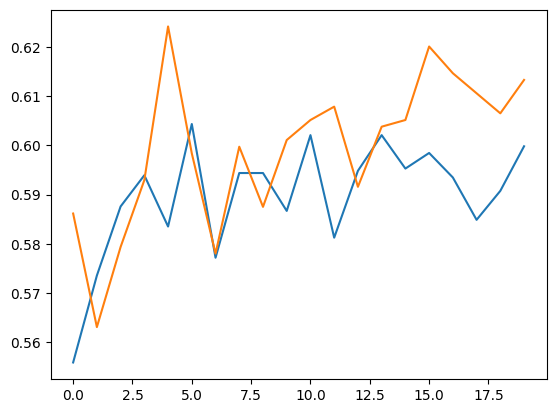

In [ ]:
# Plot the result
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

### **6.2. ResNet50**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y_cat, test_size=0.25)

In [ ]:
from keras.applications import ResNet50
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, BatchNormalization
from keras.models import Model
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers

# Load the pre-trained ResNet50 model without the top layer
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Add new layers on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu', kernel_regularizer=regularizers.l2(0.01))(x)
x = BatchNormalization()(x)
x = Dropout(0.3)(x)
predictions = Dense(3, activation='softmax')(x)

# This is the model we will train
full_model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model with a low learning rate
full_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add Early Stopping and ReduceLROnPlateau callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5)
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', factor=0.2, patience=3, min_lr=0.0001)

# Train the model with the new callbacks
hist = full_model.fit(X_train, y_train,
          batch_size=32,
          epochs=20, # Increased number of epochs for EarlyStopping
          validation_data=(X_test, y_test),
          callbacks=[early_stopping, reduce_lr],
          verbose=2)

Epoch 1/20
70/70 - 64s - 916ms/step - accuracy: 0.5224 - loss: 7.2869 - val_accuracy: 0.0719 - val_loss: 47.4431 - learning_rate: 0.0010
Epoch 2/20
70/70 - 12s - 175ms/step - accuracy: 0.5939 - loss: 3.5342 - val_accuracy: 0.5522 - val_loss: 5.3707 - learning_rate: 0.0010
Epoch 3/20
70/70 - 12s - 174ms/step - accuracy: 0.6125 - loss: 1.9982 - val_accuracy: 0.5536 - val_loss: 7.9658 - learning_rate: 0.0010
Epoch 4/20
70/70 - 12s - 175ms/step - accuracy: 0.6311 - loss: 1.3454 - val_accuracy: 0.5739 - val_loss: 1.1709 - learning_rate: 0.0010
Epoch 5/20
70/70 - 12s - 175ms/step - accuracy: 0.6464 - loss: 1.0640 - val_accuracy: 0.6201 - val_loss: 0.9659 - learning_rate: 0.0010
Epoch 6/20
70/70 - 12s - 176ms/step - accuracy: 0.6727 - loss: 0.9370 - val_accuracy: 0.6187 - val_loss: 0.8907 - learning_rate: 0.0010
Epoch 7/20
70/70 - 12s - 176ms/step - accuracy: 0.6636 - loss: 0.9209 - val_accuracy: 0.3881 - val_loss: 1.2445 - learning_rate: 0.0010
Epoch 8/20
70/70 - 12s - 176ms/step - accuracy:

In [ ]:
# Calculate the accuracy
score, acc = full_model.evaluate(X_test, y_test, batch_size=64)
print('Test score:',    score)
print('Test accuracy:', acc)

12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.7337 - loss: 0.7855
Test score: 0.8112148642539978
Test accuracy: 0.7259158492088318


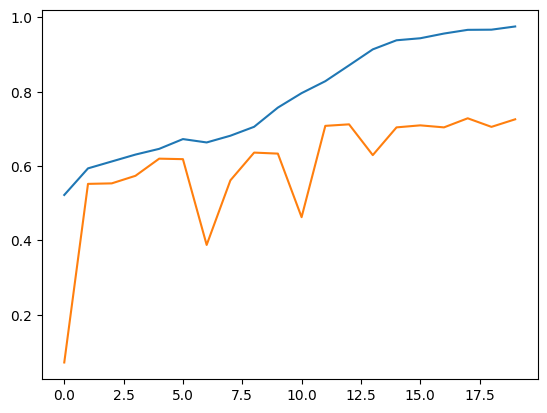

In [ ]:
# Plot the accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])

# Part 2: Sentimental Analysis

## **1. Reading & Cleaning Data**

In [3]:
sen_data = pd.read_csv("sentiment_analysis_dataset.csv")

In [4]:
# Create new dataset by only select necessary columns
sen_data = sen_data[['text', 'sentiment']]

# Remove all duplicate
sen_data = sen_data.drop_duplicates()

In [5]:
sen_data.head()

,text,sentiment
0,termine bien abrumado después de hoy,scared
1,me siento abrumado,scared
2,Me siento un poco abrumado por la cantidad de ...,scared
3,Salvador la única persona que no la ha abrumad...,scared
4,Denme un helado o algo que ando full abrumado.,scared


In [6]:
# Mapping the sentiment value
# Define mapping of old values to new values
sentiment_mapping = {
    'scared': 0,
    'mad': 0,
    'sad': 0,
    'peaceful': 1,
    'powerful': 1,
    'joyful': 1
}

# Replace values in the 'sentiment' column using the mapping
sen_data['sentiment'] = sen_data['sentiment'].replace(sentiment_mapping)

/tmp/ipykernel_54498/4198830631.py:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sen_data['sentiment'] = sen_data['sentiment'].replace(sentiment_mapping)


In [7]:
sen_data.head()

,text,sentiment
0,termine bien abrumado después de hoy,0
1,me siento abrumado,0
2,Me siento un poco abrumado por la cantidad de ...,0
3,Salvador la única persona que no la ha abrumad...,0
4,Denme un helado o algo que ando full abrumado.,0


## **2. Processing data**

### **2.1. Setting the enviroment**

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.layers import Bidirectional
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import sequence
import numpy as np

from tensorflow.keras.layers import InputLayer

### **2.2. Process & Split the data**

In [9]:
# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sen_data['text'])
X2 = tokenizer.texts_to_sequences(sen_data['text'])
X2 = pad_sequences(X2)

In [10]:
max_features = 20000
maxlen = 80
embedding_size = 128

# Assuming sen_data is your DataFrame containing text data
X2 = sen_data['text'].values
y2 = sen_data['sentiment'].values

# Split data into train and test sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=42)

tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(X2_train)

X2_train = tokenizer.texts_to_sequences(X2_train)
X2_test = tokenizer.texts_to_sequences(X2_test)

X2_train = pad_sequences(X2_train, maxlen=maxlen)
X2_test = pad_sequences(X2_test, maxlen=maxlen)

print(len(X2_train), 'train sequences')
print(len(X2_test),  'test sequences')

1892 train sequences
473 test sequences


## **3. RNN architecture: LSTM model**

In [13]:
def attention_3d_block(hidden_states):
  # Shape of hidden_states is (batch_size, seqlen, LSTM size)
  hidden_size       = int(hidden_states.shape[2]) # LSTM size
  # Create a dense layer for the attention score and fetch out the last hidden state
  score_first_part  = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)
  h_t               = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
  # Take the dot product of both, to get the final attention scores and push them through a softmax layer
  score             = dot([score_first_part, h_t], [2, 1], name='attention_score')
  attention_weights = Activation('softmax', name='attention_weight')(score)
  # Take a dot product again to create a context vector
  context_vector    = dot([hidden_states, attention_weights], [1, 1], name='context_vector')
  # Add this context vector to h_t
  pre_activation    = concatenate([context_vector, h_t], name='attention_output')
  # And create a final dense layer
  attention_vector  = Dense(128, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)

  return attention_vector

In [16]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Embedding, LSTM, Dense, SpatialDropout1D, Dropout, Bidirectional, Flatten, Lambda, dot, Activation, concatenate
from tensorflow.keras.constraints import NonNeg
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Define input layer
input_seq = Input(shape=(maxlen,))

# Embedding layer
input_emb = Embedding(max_features, embedding_size)(input_seq)
spatial_dropout = SpatialDropout1D(0.3)(input_emb)
lstm = Bidirectional(LSTM(64, dropout=0.25, recurrent_dropout=0.25, return_sequences=True))(spatial_dropout)
attention = attention_3d_block(lstm)
flatten_attention = Flatten()(attention)
dense = Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01))(flatten_attention)
dropout = Dropout(0.2)(dense)
output = Dense(1, activation='sigmoid', use_bias=False, kernel_constraint=NonNeg())(dropout)

# Define the model
lmodel = Model(inputs=input_seq, outputs=output)

# Compile the model
optimizer = Adam(learning_rate=0.001)
lmodel.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Model summary
lmodel.summary()

# Setup callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)  
model_checkpoint = ModelCheckpoint('best_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=2, min_lr=0.0001, verbose=1) 

# Train the model
history = lmodel.fit(X2_train, y2_train,
                      batch_size=32,
                      epochs=20,
                      validation_data=(X2_test, y2_test),
                      callbacks=[early_stopping, model_checkpoint, reduce_lr])

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 80)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_2         │ (None, 80, 128)   │  2,560,000 │ input_layer_2[0]… │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ spatial_dropout1d_2 │ (None, 80, 128)   │          0 │ embedding_2[0][0] │
│ (SpatialDropout1D)  │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional_2     │ (None, 80, 128)   │     98,816 │ spatial_dropout1… │
│ (Bidirectional)     │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_score_vec │ (None, 80, 128)   │     16,384 │ bidirectional_2[… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ last_hidden_state   │ (None, 128)       │          0 │ bidirectional_2[… │
│ (Lambda)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_score     │ (None, 80)        │          0 │ attention_score_… │
│ (Dot)               │                   │            │ last_hidden_stat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_weight    │ (None, 80)        │          0 │ attention_score[… │
│ (Activation)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ context_vector      │ (None, 128)       │          0 │ bidirectional_2[… │
│ (Dot)               │                   │            │ attention_weight… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_output    │ (None, 256)       │          0 │ context_vector[0… │
│ (Concatenate)       │                   │            │ last_hidden_stat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ attention_vector    │ (None, 128)       │     32,768 │ attention_output… │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_1 (Flatten) │ (None, 128)       │          0 │ attention_vector… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 64)        │      8,256 │ flatten_1[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout_1 (Dropout) │ (None, 64)        │          0 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 1)         │         64 │ dropout_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,716,288 (10.36 MB)

 Trainable params: 2,716,288 (10.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 11s 128ms/step - accuracy: 0.5384 - loss: 1.3607 - val_accuracy: 0.5476 - val_loss: 0.9647 - learning_rate: 0.0010
Epoch 2/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.5576 - loss: 0.8714 - val_accuracy: 0.5455 - val_loss: 0.7297 - learning_rate: 0.0010
Epoch 3/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 120ms/step - accuracy: 0.6426 - loss: 0.5652 - val_accuracy: 0.7273 - val_loss: 0.6500 - learning_rate: 0.0010
Epoch 4/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 116ms/step - accuracy: 0.9272 - loss: 0.3810 - val_accuracy: 0.7336 - val_loss: 0.7328 - learning_rate: 0.0010
Epoch 5/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step - accuracy: 0.9609 - loss: 0.3397
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9609 - loss: 0.3399 - val_accuracy: 0.7146 - val_loss: 0.8028 - learning_rate: 0.0010
Epoch 6/20
60/60 ━━━━━━━━━━━━━━━━━━━━ 7s 118ms/step - accuracy: 0.9697 - loss: 0.3390 -

In [17]:
score, acc = lmodel.evaluate(X2_test, y2_test, batch_size=128)
print('Test score:',    score)
print('Test accuracy:', acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7123 - loss: 0.6548
Test score: 0.6484211087226868
Test accuracy: 0.7272727489471436


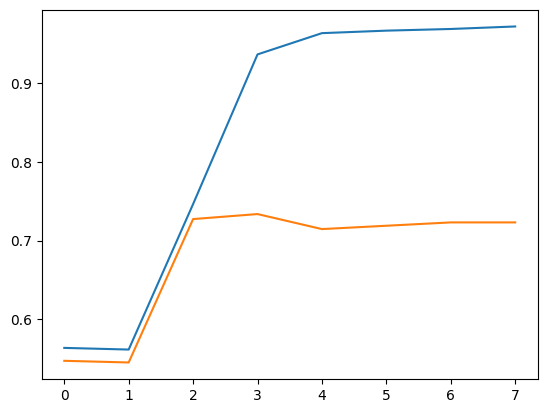

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

### **3.1 Explore the attention of RNN-LSTM**

In [20]:
test_instance_idx = 10

review     = ' '.join([[k for k,v in imdb.get_word_index().items() if v == w][0] for w in X2_test[test_instance_idx] if w > 0])
prediction = lmodel.predict(np.expand_dims(X2_test[test_instance_idx], axis=0))[0][0]

print(review)
print('Predicted', prediction, '-- true label was:', y2_test[test_instance_idx])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step
this film time saif what one goof yourself a music
Predicted 0.5 -- true label was: 1


In [22]:
scaler = MinMaxScaler()

attention_weights =  Model(inputs=lmodel.input, 
                           outputs=lmodel.get_layer("attention_weight").output)

attention = attention_weights.predict(np.expand_dims(X2_test[test_instance_idx], axis=0))

attention = np.expand_dims(
    scaler.fit_transform(np.abs(attention)[0].reshape(-1, 1)
), axis=0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step


/tmp/ipykernel_54498/4146788886.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')


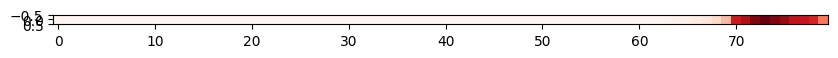

In [23]:
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex

cmap = plt.cm.get_cmap('Reds')

plt.figure(figsize=(10,10))
plt.imshow(attention, cmap=cmap)
plt.show()

In [31]:
attention.shape[1] >= 81

False

In [32]:
text = ''
for i, w in enumerate(X2_test[test_instance_idx]):
  word = [k for k,v in imdb.get_word_index().items() if v == w][0] if w != 0 else '-----'
  text += '<span style="background-color: {}">{}</span> '.format(rgb2hex(cmap(attention[0, i])[:3]), word)

HTML(text)

## **4. RNN architecture: GRU model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# Define the GRU model
gmodel = Sequential()
gmodel.add(InputLayer(shape=(None,), dtype="int32"))
gmodel.add(Embedding(max_features, embedding_size))
gmodel.add(SpatialDropout1D(0.2))  # Helps in reducing overfitting for RNN models
gmodel.add(GRU(128, dropout=0.2, recurrent_dropout=0.2))
gmodel.add(Dense(1, activation='sigmoid'))

# Compile the model
gmodel.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
gmodel.summary()

# Assuming X_train, y_train, X_test, and y_test are already defined and preprocessed accordingly
# Train the model
history_gru = gmodel.fit(X2_train, y2_train,
                    batch_size=64,
                    epochs=15,
                    validation_data=(X2_test, y2_test))

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, None, 128)      │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d_1             │ (None, None, 128)      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,659,201 (10.14 MB)

 Trainable params: 2,659,201 (10.14 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.5377 - loss: 0.6885 - val_accuracy: 0.5518 - val_loss: 0.6802
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.6292 - loss: 0.6304 - val_accuracy: 0.6533 - val_loss: 0.6537
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.8435 - loss: 0.4561 - val_accuracy: 0.6956 - val_loss: 0.6248
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.9373 - loss: 82.1634 - val_accuracy: 0.6786 - val_loss: 0.6136
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 0.9334 - loss: 0.2633 - val_accuracy: 0.6892 - val_loss: 0.6088
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.9723 - loss: 0.1980 - val_accuracy: 0.6808 - val_loss: 0.6274
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.9636 - loss: 0.1383 - val_accuracy: 0.6913 - val_loss: 0.6287
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.9856 - loss: 0.0855 - val_accuracy: 0

In [ ]:
# Calculate the accuracy
score, acc = gmodel.evaluate(X2_test, y2_test, batch_size=128)
print('Test score:',    score)
print('Test accuracy:', acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.6670 - loss: 0.7374
Test score: 0.7195426225662231
Test accuracy: 0.6871035695075989


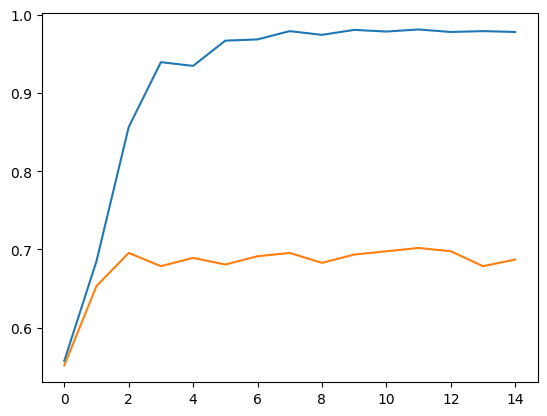

In [ ]:
plt.plot(history_gru.history['accuracy'])
plt.plot(history_gru.history['val_accuracy'])

## **5. CNN model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Define model parameters
max_features = 20000  # or the length of your tokenizer's word index + 1
maxlen = 80  # or the maximum sequence length you've set
embedding_size = 128  # This can be any size you wish

# Define the CNN model
model_cnn = Sequential()
model_cnn.add(InputLayer(shape=(None,), dtype="int32"))
model_cnn.add(Embedding(max_features, embedding_size))
model_cnn.add(Conv1D(128, 5, activation='relu'))
model_cnn.add(GlobalMaxPooling1D())
model_cnn.add(Dense(10, activation='relu'))
model_cnn.add(Dense(1, activation='sigmoid'))

# Compile the model
model_cnn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Model summary
model_cnn.summary()

# Train the model
history_cnn = model_cnn.fit(X2_train, y2_train,
                            batch_size=64,
                            epochs=15,
                            validation_data=(X2_test, y2_test))

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, None, 128)      │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, None, 128)      │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │         1,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,643,349 (10.08 MB)

 Trainable params: 2,643,349 (10.08 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 52ms/step - accuracy: 0.5496 - loss: 0.6879 - val_accuracy: 0.5476 - val_loss: 0.6841
Epoch 2/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5697 - loss: 0.6445 - val_accuracy: 0.6025 - val_loss: 0.6575
Epoch 3/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8475 - loss: 0.5272 - val_accuracy: 0.7378 - val_loss: 0.5484
Epoch 4/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9800 - loss: 0.2543 - val_accuracy: 0.8753 - val_loss: 0.3833
Epoch 5/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9805 - loss: 0.0751 - val_accuracy: 0.8309 - val_loss: 0.4352
Epoch 6/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9801 - loss: 0.0481 - val_accuracy: 0.8964 - val_loss: 0.3233
Epoch 7/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9750 - loss: 0.0475 - val_accuracy: 0.9006 - val_loss: 0.3260
Epoch 8/15
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9841 - loss: 0.0431 - val_accuracy: 0.8985 - val_loss

In [ ]:
# Calculate the accuracy
score, acc = model_cnn.evaluate(X2_test, y2_test, batch_size=128)
print('Test score:',    score)
print('Test accuracy:', acc)

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 117ms/step - accuracy: 0.8987 - loss: 0.3348
Test score: 0.3119742274284363
Test accuracy: 0.9069767594337463


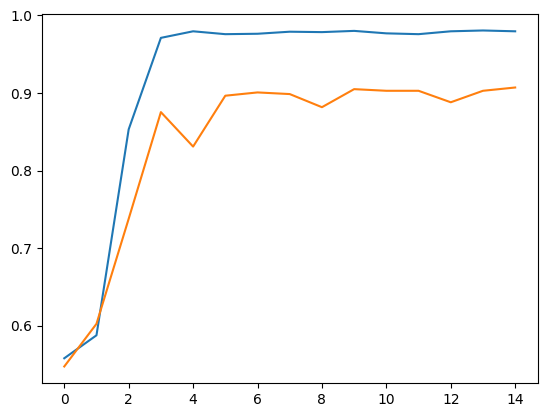

In [ ]:
plt.plot(history_cnn.history['accuracy'])
plt.plot(history_cnn.history['val_accuracy'])